<a href="https://colab.research.google.com/github/Satyam-16/CPP/blob/main/dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the dog vs cat dataset from kaggle

In [8]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [11]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [12]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count) 

Number of images:  25000


printing the name of images

In [13]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.5012.jpg', 'cat.4746.jpg', 'dog.12428.jpg', 'dog.8926.jpg', 'cat.11395.jpg', 'dog.10131.jpg', 'dog.4378.jpg', 'dog.2350.jpg', 'dog.4556.jpg', 'cat.10974.jpg', 'dog.6292.jpg', 'dog.3351.jpg', 'dog.11891.jpg', 'dog.9532.jpg', 'cat.5338.jpg', 'cat.5642.jpg', 'dog.4730.jpg', 'cat.12383.jpg', 'cat.9620.jpg', 'dog.6029.jpg', 'cat.10504.jpg', 'cat.41.jpg', 'dog.4639.jpg', 'dog.11955.jpg', 'dog.6862.jpg', 'dog.2414.jpg', 'cat.3303.jpg', 'cat.10083.jpg', 'dog.7345.jpg', 'dog.4464.jpg', 'cat.8555.jpg', 'cat.5563.jpg', 'dog.3057.jpg', 'cat.4826.jpg', 'cat.3865.jpg', 'dog.5023.jpg', 'cat.908.jpg', 'cat.10686.jpg', 'cat.7073.jpg', 'dog.1664.jpg', 'cat.8124.jpg', 'dog.10078.jpg', 'dog.11818.jpg', 'cat.5050.jpg', 'cat.723.jpg', 'cat.4075.jpg', 'cat.7089.jpg', 'dog.3600.jpg', 'dog.5220.jpg', 'cat.5264.jpg', 'dog.6583.jpg', 'dog.12158.jpg', 'cat.1250.jpg', 'cat.7944.jpg', 'cat.4748.jpg', 'dog.8923.jpg', 'dog.5305.jpg', 'cat.8660.jpg', 'cat.8652.jpg', 'dog.9964.jpg', 'dog.3114.jpg', 'cat.7727.jpg'

importing the dependencies

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

displaying the image of dogs and cats

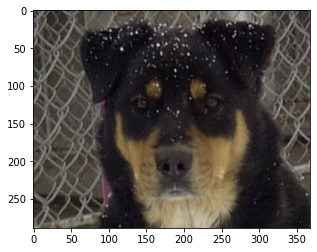

In [78]:
#display dog image
img = mpimg.imread('/content/train/dog.5012.jpg')
imgplot = plt.imshow(img)
plt.show()

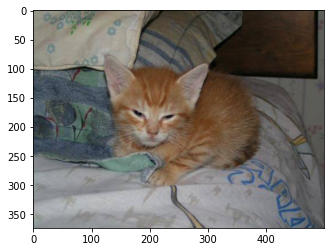

In [91]:
#display cat image
img = mpimg.imread('/content/train/cat.7089.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
dog
dog
cat


In [39]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1

  else:
   cat_count += 1

print('Numbers of dog images=', dog_count)
print('Numbers of cat images=', cat_count)

Numbers of dog images= 12500
Numbers of cat images= 12500


resizing all the image

In [67]:
#creating a directory for resized images
os.mkdir('/content/image  resized')

In [81]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgpath = resized_folder+filename
  img.save(newImgpath)

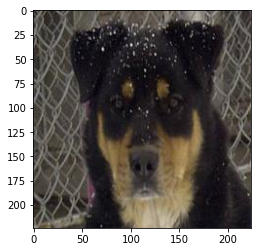

In [83]:
#display resized dog image
img = mpimg.imread('/content/image resized/dog.5012.jpg')
imgplot = plt.imshow(img)
plt.show()

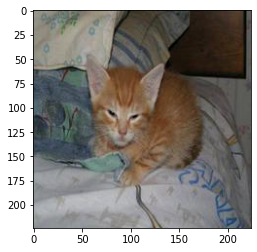

In [90]:
#display resized cat image
img = mpimg.imread('/content/image resized/cat.7089.jpg')
imgplot = plt.imshow(img)
plt.show()

creating labels for resized images of cat and dog

cat->0

dog->1

In [92]:
#creating a for loop to assign label
filenames = os.listdir('/content/image resized')


labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
    
  else:
    labels.append(0)

In [93]:
print(filenames[0:5])
print(len(filenames))

['dog.5012.jpg', 'cat.4746.jpg', 'dog.12428.jpg', 'dog.8926.jpg', 'cat.11395.jpg']
2000


In [96]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 0]
2000


In [98]:
#counting the number of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)


[0 1]
[1019  981]


converting all the resized images into numpy arrays

In [99]:
import cv2
import glob

In [104]:
image_directory ='/content/image resized/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory +'*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [105]:
print(dog_cat_images)

[[[[ 44  48  49]
   [ 65  69  70]
   [ 73  77  78]
   ...
   [ 61  63  71]
   [ 82  84  92]
   [ 91  93 101]]

  [[ 72  76  77]
   [ 56  60  61]
   [ 46  50  51]
   ...
   [ 51  53  61]
   [ 69  71  79]
   [ 83  85  93]]

  [[ 84  88  89]
   [ 60  64  65]
   [ 34  38  39]
   ...
   [ 41  43  51]
   [ 58  60  68]
   [ 78  80  88]]

  ...

  [[ 84  92  99]
   [114 122 129]
   [122 132 139]
   ...
   [ 35  26  29]
   [ 37  28  31]
   [ 40  31  34]]

  [[106 114 121]
   [133 141 148]
   [132 142 149]
   ...
   [ 33  24  27]
   [ 36  27  30]
   [ 40  31  34]]

  [[118 126 133]
   [143 151 158]
   [135 145 152]
   ...
   [ 25  16  19]
   [ 29  20  23]
   [ 35  26  29]]]


 [[[237 243 248]
   [203 209 214]
   [123 130 133]
   ...
   [122 121 123]
   [121 120 122]
   [121 120 122]]

  [[238 244 249]
   [203 209 214]
   [122 129 132]
   ...
   [122 121 123]
   [121 120 122]
   [121 120 122]]

  [[238 244 249]
   [204 210 215]
   [123 130 133]
   ...
   [123 122 124]
   [122 121 123]
   [121 120

In [106]:
type(dog_cat_images)

numpy.ndarray

In [107]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [108]:
X = dog_cat_images
Y = np.asarray(labels)

train test split

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [110]:
print(X.shape, X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600-->training images

400-->test images

In [123]:
#scaling the data
X_train_scaled = X_train/255

X_test_scaled =X_test/255

In [124]:
print(X_train_scaled)

[[[[0.52156863 0.50980392 0.54509804]
   [0.52156863 0.50980392 0.54509804]
   [0.52941176 0.51372549 0.5372549 ]
   ...
   [0.04705882 0.05490196 0.1254902 ]
   [0.05098039 0.05882353 0.12941176]
   [0.05098039 0.05882353 0.12941176]]

  [[0.50980392 0.49803922 0.53333333]
   [0.50588235 0.49411765 0.52941176]
   [0.50980392 0.49411765 0.51764706]
   ...
   [0.05882353 0.06666667 0.1372549 ]
   [0.05882353 0.06666667 0.1372549 ]
   [0.05882353 0.06666667 0.1372549 ]]

  [[0.40784314 0.39607843 0.43137255]
   [0.40392157 0.39215686 0.42745098]
   [0.40392157 0.38823529 0.41176471]
   ...
   [0.05098039 0.05490196 0.13333333]
   [0.04705882 0.05098039 0.12941176]
   [0.04705882 0.05098039 0.12941176]]

  ...

  [[0.51764706 0.38823529 0.32941176]
   [0.52156863 0.39215686 0.33333333]
   [0.5254902  0.38823529 0.33333333]
   ...
   [0.85490196 0.67843137 0.50980392]
   [0.85490196 0.6745098  0.51372549]
   [0.84705882 0.6745098  0.51372549]]

  [[0.51764706 0.38431373 0.32156863]
   [0.5

building the neural network

In [125]:
import tensorflow as tf
import tensorflow_hub as hub

In [126]:
mobilenet_model ='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model =hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)

In [127]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [131]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
    metrics =['acc']
)

In [132]:
model.fit(X_train_scaled, Y_train, epochs=5 )

Epoch 1/5
50/50 [==============================] - 52s 934ms/step - loss: 0.1761 - acc: 0.9381
Epoch 2/5
50/50 [==============================] - 45s 907ms/step - loss: 0.0625 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 45s 908ms/step - loss: 0.0496 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 46s 915ms/step - loss: 0.0406 - acc: 0.9837
Epoch 5/5
50/50 [==============================] - 46s 919ms/step - loss: 0.0320 - acc: 0.9906


In [133]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print('Test Loss=', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 874ms/step - loss: 0.0413 - acc: 0.9850
Test Loss= 0.0413353331387043
Test Accuracy = 0.9850000143051147


predictive system

Path of the image to be predicted: /content/The_Dog.jpg


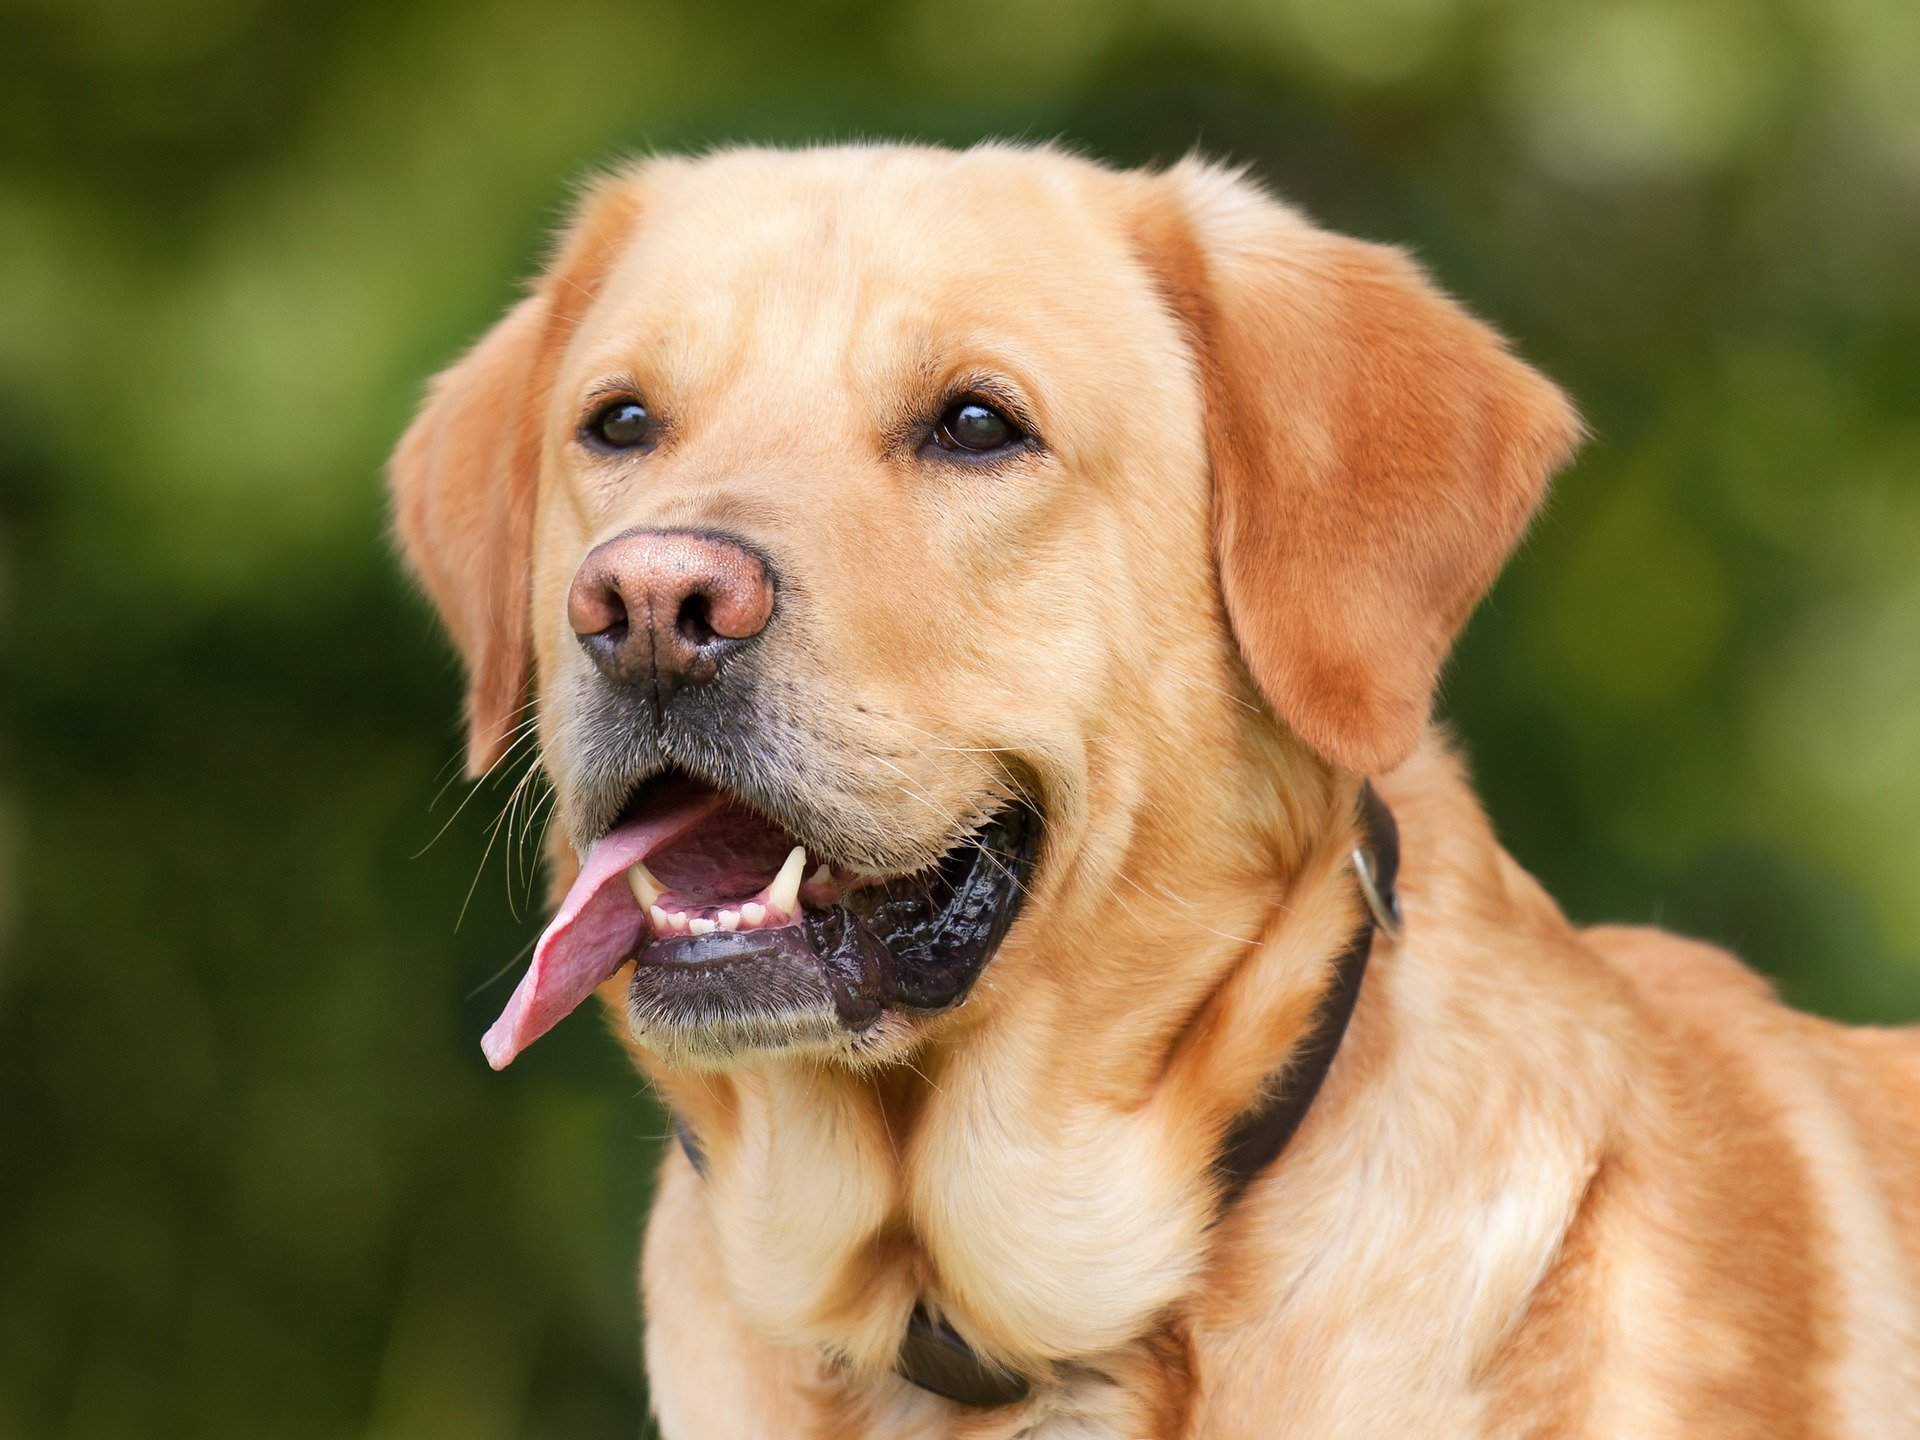

1/1 [==============================] - 0s 91ms/step
The image represents a dog


In [140]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a cat')
else:
  print('The image represents a dog')